# Multiple Linear Regression

In this notebook, we'll build a multiple linear regression model to predict `Salary` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [300]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [301]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [302]:
# Read the given CSV file, and view some sample records

salary_data = pd.read_csv("Salary_Data.csv")
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [303]:
salary_data.shape

(6704, 6)

In [304]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [305]:
salary_data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [306]:
#Total records are 6704 but all columns are having records less than that so from above we can understand that all columns having null values

### Treating null values

In [307]:
salary_data[salary_data['Age'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
#dropping above rows

salary_data = salary_data.dropna(subset=['Age'])

In [309]:
salary_data[salary_data['Age'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [310]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.5+ KB


In [311]:
# null values treated for Age, Gender and Job Title

In [312]:
#looking at null values in Education level

In [313]:
salary_data[salary_data['Education Level'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2011,27.0,Male,NaN,Developer,7.0,100000.0


In [314]:
#since this row is having all the other details except Education level we will impute value in place of null value

In [315]:
salary_data['Education Level'].value_counts()

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [316]:
#most of the values are Bachelor's Degree we will impute this value in place of null value

In [317]:
salary_data['Education Level'].fillna(salary_data['Education Level'].mode()[0], inplace=True)

In [318]:
salary_data[salary_data['Education Level'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [319]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6702 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.5+ KB


In [320]:
#Treating null values in Years of Experience column

In [321]:
salary_data[salary_data['Years of Experience'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN


In [322]:
#Since here Salary is also showing null, it's no use of treating Years of Experience separately

In [323]:
#We will treat Salary column itself for null values

In [324]:
salary_data[salary_data['Salary'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


We are working on predicting Salary only by building the model for now let us drop these rows.

In [325]:
salary_data = salary_data.dropna(subset=['Salary'])

In [326]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6699 non-null   float64
 1   Gender               6699 non-null   object 
 2   Education Level      6699 non-null   object 
 3   Job Title            6699 non-null   object 
 4   Years of Experience  6699 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.4+ KB


#### Now there are no null values.

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

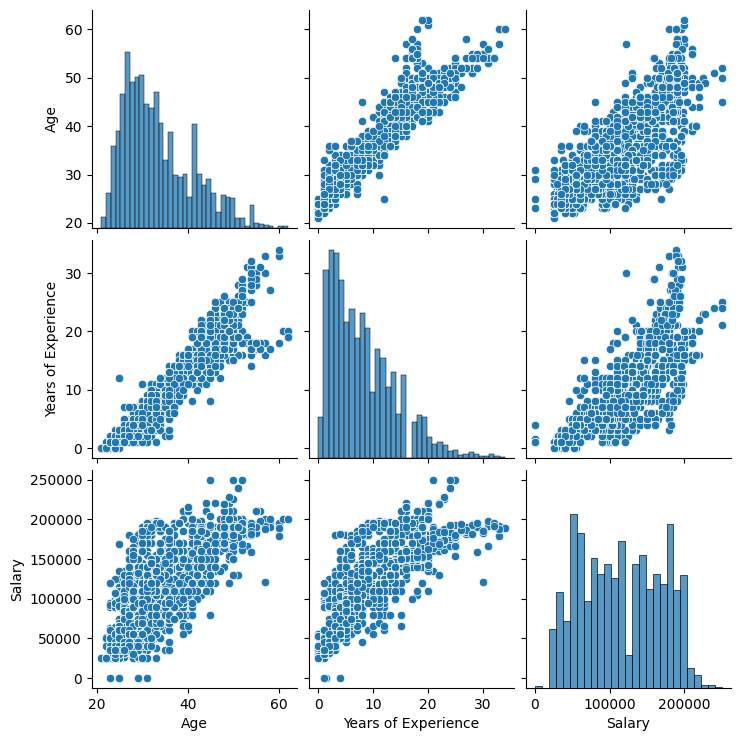

In [328]:
sns.pairplot(salary_data)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

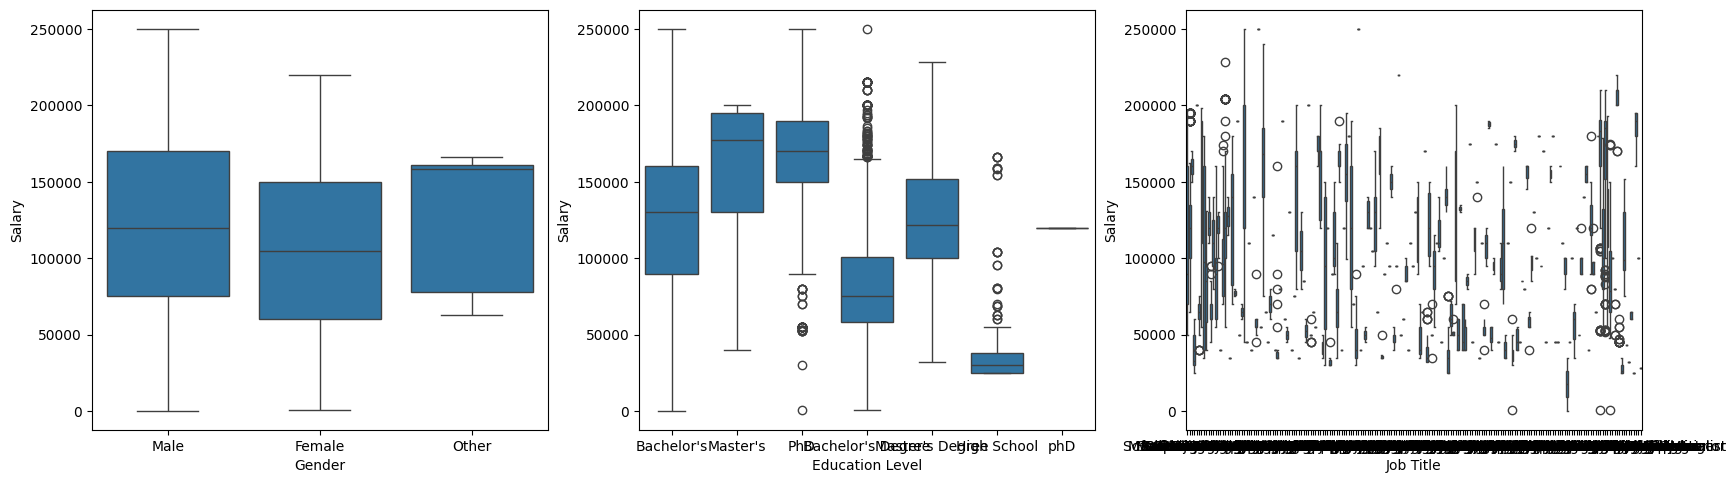

In [329]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Gender', y = 'Salary', data = salary_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'Education Level', y = 'Salary', data = salary_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'Job Title', y = 'Salary', data = salary_data)
plt.show()

#### Since Job title is having many values we will drop it from Categorical variable.

#### Education level has category with same values like Bachelor's Degree and Bachelor's, Master's Degree and Master's, PhD and phD. We will change them as one category only and then plot boxplot.

In [330]:
salary_data['Education Level'].value_counts()

Education Level
Bachelor's Degree    2266
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [331]:
salary_data.loc[salary_data['Education Level'] == "Bachelor's Degree", 'Education Level'] = "Bachelor's"

In [332]:
salary_data.loc[salary_data['Education Level'] == "Master's Degree", 'Education Level'] = "Master's"

In [333]:
salary_data.loc[salary_data['Education Level'] == "phD", 'Education Level'] = "PhD"

In [334]:
salary_data['Education Level'].value_counts()

Education Level
Bachelor's     3022
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

#### Now we will plot 

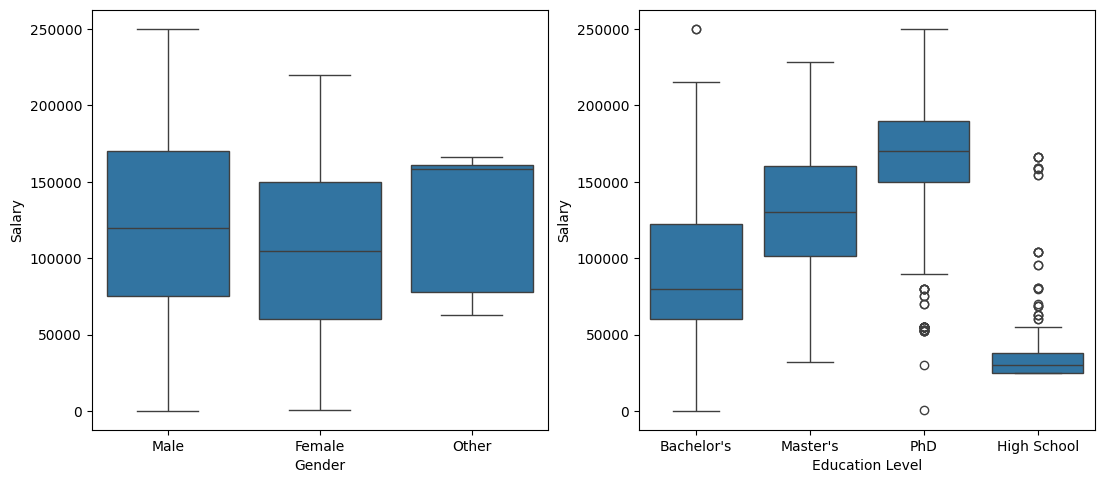

In [335]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Gender', y = 'Salary', data = salary_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'Education Level', y = 'Salary', data = salary_data)
plt.show()

## Step 3: Data Preparation

### Dummy Variables

The variable Gender has three levels and Education level has four levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.

In [336]:
# Get the dummy variables for the feature 'Gender'

In [337]:
gender = pd.get_dummies(salary_data['Gender'], dtype=int)

In [338]:
gender.head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


Now, the type of Gender can be identified as — 
- `100` will correspond to `Female`
- `010` will correspond to `Other`
- `001` will correspond to `Male`

In [339]:
# Add the results to the original salary_data dataframe

salary_data = pd.concat([salary_data, gender], axis = 1)

In [340]:
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Female,Male,Other
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,0,1,0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,1,0,0
4,52.0,Male,Master's,Director,20.0,200000.0,0,1,0


In [341]:
# Drop 'Gender' as we have created the dummies for it

salary_data.drop(['Gender'], axis = 1, inplace = True)

In [342]:
salary_data.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Female,Male,Other
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,0,1,0
1,28.0,Master's,Data Analyst,3.0,65000.0,1,0,0
2,45.0,PhD,Senior Manager,15.0,150000.0,0,1,0
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,1,0,0
4,52.0,Master's,Director,20.0,200000.0,0,1,0


In [343]:
# Get the dummy variables for the feature 'Education Level'

In [344]:
edu_level = pd.get_dummies(salary_data['Education Level'], dtype=int)

In [345]:
edu_level.head()

,Bachelor's,High School,Master's,PhD
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


Now, the type of Education Level can be identified as — 
- `1000` will correspond to `Bachelor's`
- `0100` will correspond to `High School`
- `0010` will correspond to `Master's`
- `0001` will correspond to `Phd`

In [346]:
# Add the results to the original salary_data dataframe

salary_data = pd.concat([salary_data, edu_level], axis = 1)

In [347]:
salary_data.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Female,Male,Other,Bachelor's,High School,Master's,PhD
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,0,1,0,1,0,0,0
1,28.0,Master's,Data Analyst,3.0,65000.0,1,0,0,0,0,1,0
2,45.0,PhD,Senior Manager,15.0,150000.0,0,1,0,0,0,0,1
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,1,0,0,1,0,0,0
4,52.0,Master's,Director,20.0,200000.0,0,1,0,0,0,1,0


In [348]:
# Drop 'Education Level' as we have created the dummies for it

salary_data.drop(['Education Level'], axis = 1, inplace = True)

In [349]:
salary_data.head()

,Age,Job Title,Years of Experience,Salary,Female,Male,Other,Bachelor's,High School,Master's,PhD
0,32.0,Software Engineer,5.0,90000.0,0,1,0,1,0,0,0
1,28.0,Data Analyst,3.0,65000.0,1,0,0,0,0,1,0
2,45.0,Senior Manager,15.0,150000.0,0,1,0,0,0,0,1
3,36.0,Sales Associate,7.0,60000.0,1,0,0,1,0,0,0
4,52.0,Director,20.0,200000.0,0,1,0,0,0,1,0


#### Now we have almost all columns with Numerical Values except `Job Title`.

In [350]:
salary_data['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: count, Length: 192, dtype: int64

#### Since this is having many categories (192) it will be difficult to convert it to dummy variables. Hence we will ignore this column while building Multiple Linear Regression model.

In [351]:
#We will drop this column and create new DataFrame
salary = salary_data.drop('Job Title', axis=1)

In [352]:
salary.head()

,Age,Years of Experience,Salary,Female,Male,Other,Bachelor's,High School,Master's,PhD
0,32.0,5.0,90000.0,0,1,0,1,0,0,0
1,28.0,3.0,65000.0,1,0,0,0,0,1,0
2,45.0,15.0,150000.0,0,1,0,0,0,0,1
3,36.0,7.0,60000.0,1,0,0,1,0,0,0
4,52.0,20.0,200000.0,0,1,0,0,0,1,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [353]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(salary, train_size = 0.7, test_size = 0.3, random_state = 23)

### Rescaling the Features 

In [354]:
from sklearn.preprocessing import MinMaxScaler

In [355]:
scaler = MinMaxScaler()

In [356]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['Age', 'Years of Experience', 'Salary']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [357]:
df_train.head()

,Age,Years of Experience,Salary,Female,Male,Other,Bachelor's,High School,Master's,PhD
4864,0.365854,0.323529,0.538986,0,1,0,0,0,0,1
5509,0.268293,0.205882,0.478853,0,1,0,1,0,0,0
3363,0.219512,0.147059,0.358589,1,0,0,1,0,0,0
690,0.195122,0.176471,0.679294,0,1,0,1,0,0,0
3419,0.121951,0.058824,0.138104,1,0,0,0,1,0,0


In [358]:
df_train.describe()

,Age,Years of Experience,Salary,Female,Male,Other,Bachelor's,High School,Master's,PhD
count,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000
mean,0.306150,0.236724,0.459820,0.455108,0.542973,0.001919,0.457027,0.065686,0.275538,0.201749
std,0.184325,0.176775,0.211293,0.498034,0.498203,0.043773,0.498203,0.247758,0.446833,0.401348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170732,0.088235,0.278413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.268293,0.205882,0.458809,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.414634,0.352941,0.639206,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


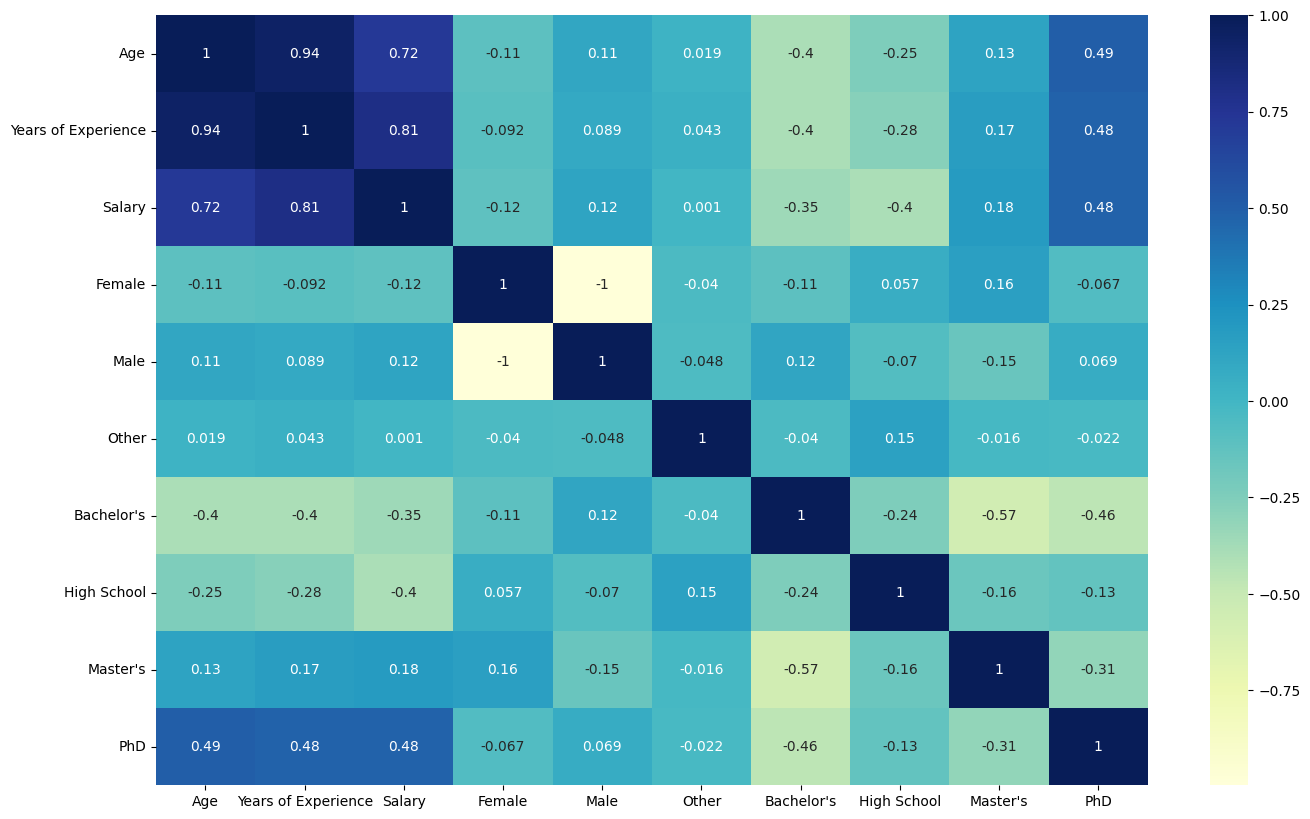

In [359]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `Age` and `Years of Experience` seems to the correlated to `Salary` the most. Let's see a pairplot for `Age` vs `Salary` and `Years of Experience` vs `Salary`.

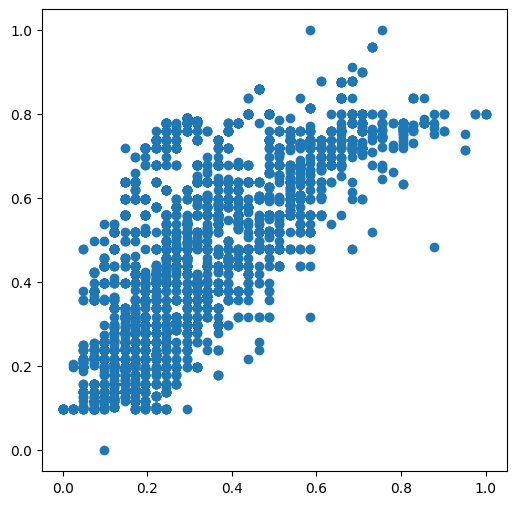

In [360]:
plt.figure(figsize=[6,6])
plt.scatter(df_train['Age'], df_train['Salary'])
plt.show()

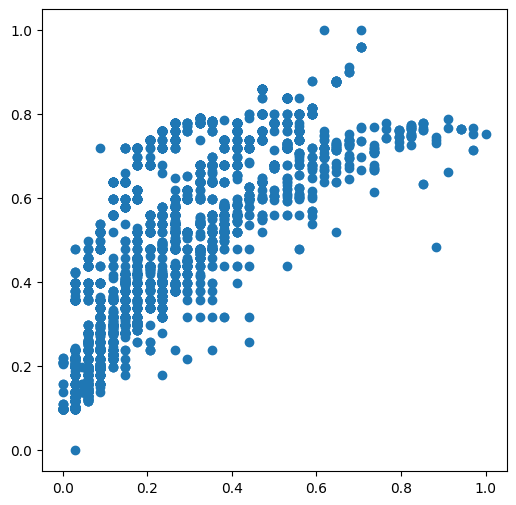

In [361]:
plt.figure(figsize=[6,6])
plt.scatter(df_train['Years of Experience'], df_train['Salary'])
plt.show()

So, we pick `Age` and `Years of Experience` as predictors and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [362]:
y_train = df_train.pop('Salary')
X_train = df_train

In [363]:
X_train.head()

,Age,Years of Experience,Female,Male,Other,Bachelor's,High School,Master's,PhD
4864,0.365854,0.323529,0,1,0,0,0,0,1
5509,0.268293,0.205882,0,1,0,1,0,0,0
3363,0.219512,0.147059,1,0,0,1,0,0,0
690,0.195122,0.176471,0,1,0,1,0,0,0
3419,0.121951,0.058824,1,0,0,0,1,0,0


In [364]:
y_train.head()

4864    0.538986
5509    0.478853
3363    0.358589
690     0.679294
3419    0.138104
Name: Salary, dtype: float64

## Step 5: Building a Multiple Regression model

In [365]:
import statsmodels.api as sm

#### <span style="color: blue;">Model 1</span>

In [366]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['Age','Years of Experience']])

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [367]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     4565.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:19:12   Log-Likelihood:                 3171.0
No. Observations:                4689   AIC:                            -6336.
Df Residuals:                    4686   BIC:                            -6317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2561      0.004     69.771      0.000       0.249       0.263
Age                    -0.3310      0.028    -11.664      0.000      -0.387      -0.275
Years of Experience     1.2885      0.030     43.544      0.000       1.230       1.346
==============================================================================
Omnibus:                       95.757   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.363
Skew:                           0.296   Prob(JB):                     3.99e-25
Kurtosis:                       3.473   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color: blue;">So, from above **Model 1** summary we can see that 66.1% variance is explained by `Age` and `Years of Experience`. Both the variables having p-value as 0.00 so both are significant to Salary. Only we can see that coeficient for Age is negative.</span>

<span style="color: blue;">Now we will add another variable `PhD` which has correlation of 0.48 with Salary and lets see how model reacts.</span>

#### <span style="color: blue;">Model 2</span>

In [368]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['Age','Years of Experience','PhD']])

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm).fit()

In [369]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     3237.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:19:12   Log-Likelihood:                 3268.2
No. Observations:                4689   AIC:                            -6528.
Df Residuals:                    4685   BIC:                            -6503.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2644      0.004     72.559      0.000       0.257       0.272
Age                    -0.3870      0.028    -13.780      0.000      -0.442      -0.332
Years of Experience     1.2655      0.029     43.588      0.000       1.209       1.322
PhD                     0.0712      0.005     14.078      0.000       0.061       0.081
==============================================================================
Omnibus:                      127.656   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.310
Skew:                           0.354   Prob(JB):                     1.39e-33
Kurtosis:                       3.522   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color: blue;">So, from above **Model 2** we can see that variance has been increased from 66.1% to 67.5% by adding `PhD` variable. Also all the 3 variables are having p-value as 0.00 means all 3 variables are significant to Salary. </span>

<span style="color: blue;">Instead of adding one by one variable and creating model we will create next model with all the variables and the drop the insignificant variables.</span>

### Adding all the variables to the model

#### <span style="color: blue;">Model 3</span>

In [370]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm).fit()

In [371]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1687.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:19:13   Log-Likelihood:                 3588.5
No. Observations:                4689   AIC:                            -7161.
Df Residuals:                    4681   BIC:                            -7109.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1741      0.008     20.775      0.000       0.158       0.191
Age                    -0.3735      0.026    -14.154      0.000      -0.425      -0.322
Years of Experience     1.1392      0.028     40.914      0.000       1.085       1.194
Female                  0.0496      0.010      4.833      0.000       0.029       0.070
Male                    0.0761      0.010      7.400      0.000       0.056       0.096
Other                   0.0484      0.028      1.715      0.086      -0.007       0.104
Bachelor's              0.0421      0.003     12.354      0.000       0.035       0.049
High School            -0.1007      0.006    -18.132      0.000      -0.112      -0.090
Master's                0.0924      0.004     23.413      0.000       0.085       0.100
PhD                     0.1403      0.005     28.758      0.000       0.131       0.150
==============================================================================
Omnibus:                      223.084   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.892
Skew:                           0.532   Prob(JB):                     3.67e-57
Kurtosis:                       3.446   Cond. No.                     1.61e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<span style="color: blue;">So, with above **Model 3** we can see that 71.6% variance is explained by all the variables. But if we see p-values all the variables are having p-values 0.00 except Other as Gender. Means this variable is not really significant. Maybe can we drop it? </span>

<span style="color: blue;">We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. </span>

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [372]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [373]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Female,inf
3,Male,inf
4,Other,inf
5,Bachelor's,inf
6,High School,inf
7,Master's,inf
8,PhD,inf
1,Years of Experience,8.95
0,Age,8.74


#### <span style="color: blue;">If the **Variance Inflation Factor (VIF)** value is infinity (`inf`), it typically means there is perfect multicollinearity in your dataset. This happens when one or more independent variables are perfectly correlated with each other.</span></span>

#### <span style="color: blue;">Hence we will not use all these variables in our model and we will go ahead with **Model 1** only with `Age` and `Years of Experience` variables.</span>

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [374]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['Age','Years of Experience']])

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [375]:
y_train_salary = lr1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

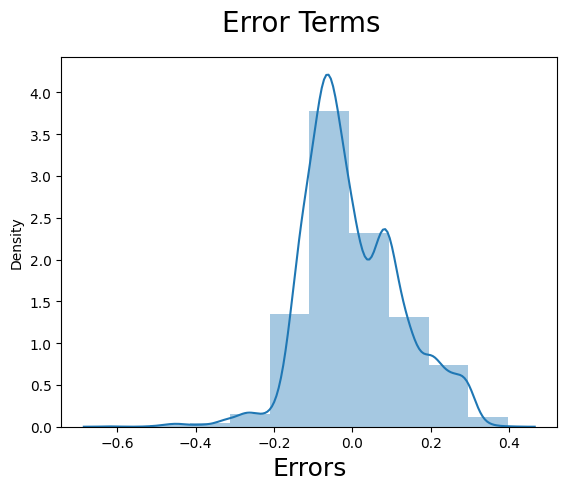

In [376]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_salary), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. first model.

#### Applying the scaling on the test sets

In [377]:
num_vars = ['Age', 'Years of Experience', 'Salary']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [378]:
df_test.describe()

,Age,Years of Experience,Salary,Female,Male,Other,Bachelor's,High School,Master's,PhD
count,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,0.311831,0.241272,0.460821,0.437313,0.560199,0.002488,0.437313,0.069652,0.282587,0.210448
std,0.189010,0.181586,0.212399,0.496178,0.496486,0.049826,0.496178,0.254623,0.450369,0.407728
min,0.000000,0.000000,-0.000802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170732,0.088235,0.278413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.268293,0.205882,0.475743,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.414634,0.352941,0.639206,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [379]:
y_test = df_test.pop('Salary')
X_test = df_test

In [380]:
X_test.head()

,Age,Years of Experience,Female,Male,Other,Bachelor's,High School,Master's,PhD
4508,0.146341,0.088235,1,0,0,1,0,0,0
716,0.073171,0.029412,0,1,0,1,0,0,0
4601,0.121951,0.058824,1,0,0,0,0,1,0
4382,0.170732,0.058824,1,0,0,1,0,0,0
3817,0.487805,0.382353,0,1,0,0,0,0,1


In [381]:
y_test.head()

4508    0.242333
716     0.358589
4601    0.218280
4382    0.142113
3817    0.559030
Name: Salary, dtype: float64

In [382]:
# Add a constant
X_test_lm = sm.add_constant(X_test[['Age','Years of Experience']])

In [383]:
y_test_pred = lr1.predict(X_test_lm)

### Checking predicted values by storing them in Dataframe

In [385]:
df_prediction = pd.DataFrame()

In [387]:
df_prediction=X_test_lm
df_prediction['Salary']=y_test
df_prediction['Predicted Salary']=y_test_pred

In [388]:
df_prediction.head()

,const,Age,Years of Experience,Salary,Predicted Salary
4508,1.0,0.146341,0.088235,0.242333,0.321392
716,1.0,0.073171,0.029412,0.358589,0.269818
4601,1.0,0.121951,0.058824,0.218280,0.291568
4382,1.0,0.170732,0.058824,0.142113,0.275422
3817,1.0,0.487805,0.382353,0.559030,0.587331


## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

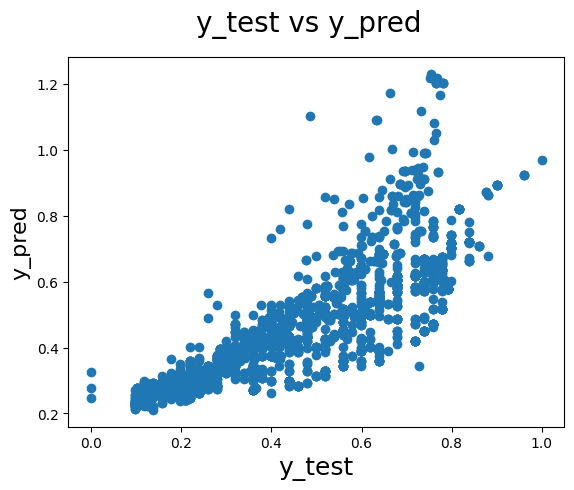

In [389]:
# Plotting y_test and y__test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  


We can see that the equation of our best fitted line is:

$ Salary = 1.2885  \times  Years of Experience - 0.3310  \times  Age + 0.2561 $


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

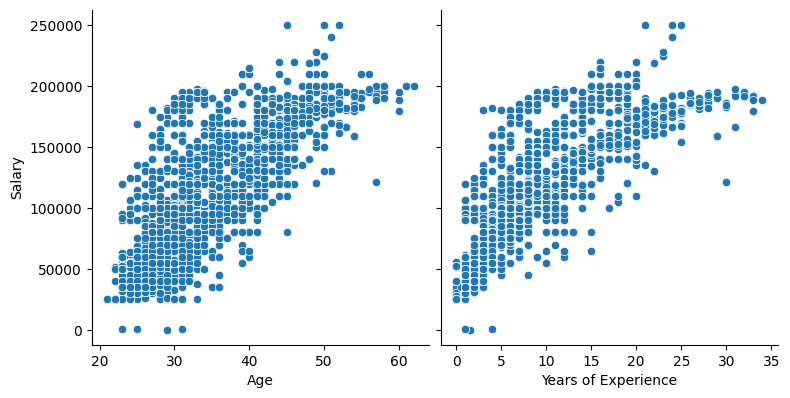

In [29]:
sns.pairplot(salary_data, x_vars=['Age', 'Years of Experience'], y_vars='Salary', size=4, kind='scatter')

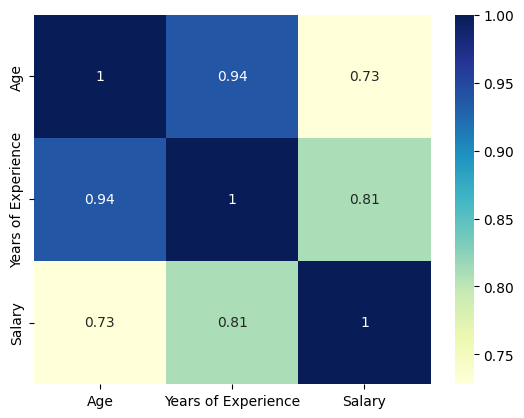

In [30]:
sns.heatmap(salary_data[['Age', 'Years of Experience','Salary']].corr(), cmap="YlGnBu", annot = True)
plt.show()

### As is visible from the pairplot and the heatmap, the variable Years of Experience seems to be most correlated with Salary. So let's go ahead and perform simple linear regression using Years of Experience as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Years  of  Experience$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `Years of Experience`, in this case, to the variable `X` and the response variable, `Salary`, to the variable `y`.

In [31]:
X = salary_data['Years of Experience']
y = salary_data['Salary']

#### Train-Test Split

You now need to split our variable into training and testing sets. We'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=17)

In [34]:
#let's now take a look at train data sets

In [35]:
X_train.head()

1837     6.0
3832    13.0
1763     3.0
4536     4.0
284      9.0
Name: Years of Experience, dtype: float64

In [36]:
y_train.head()

1837    115000.0
3832    140000.0
1763     90000.0
4536     70000.0
284     100000.0
Name: Salary, dtype: float64

#### Building a Linear Model

We first need to import the `statsmodels.api` library using which we'll perform the linear regression.

In [37]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below.

In [38]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [39]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [40]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const                  58104.743825
Years of Experience     7032.017594
dtype: float64

In [41]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     8971.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:20:54   Log-Likelihood:                -55131.
No. Observations:                4689   AIC:                         1.103e+05
Df Residuals:                    4687   BIC:                         1.103e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 5.81e+04    

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Years of Experience is 7032.0176, with a very low p value.

##### 2. R - squared is 0.657
Meaning that 65.7% of the variance in `Salary` is explained by `Years of Experience`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (== 0)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Salary = 58104.74 + 7032.02 \times Years of Experience $

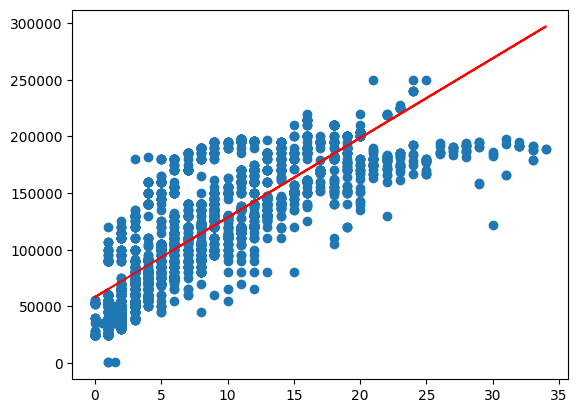

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 58104.74 + 7032.02*X_train, 'r')
plt.show()

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [43]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

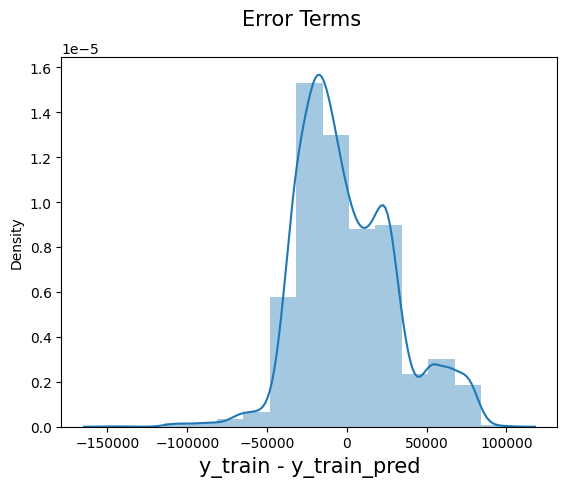

In [44]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are not normally distributed with a mean 0. Means Salary is not only depend on Years of experience but other factors too. But since we are doing linear regressio practice though this model is not fit for linear regression we will try to check how it is depend on Years of experience.

#### Looking for patterns in the residuals

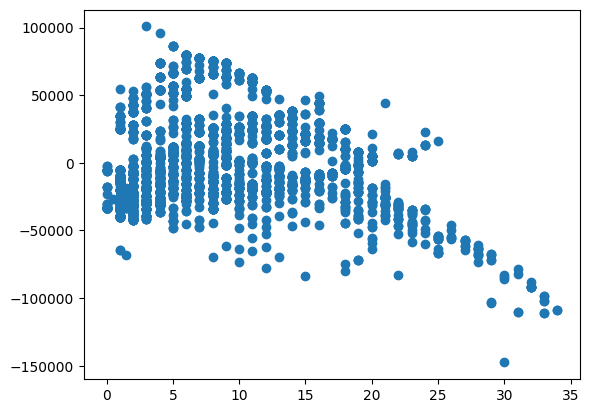

In [45]:
plt.scatter(X_train,res)
plt.show()

In [46]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [47]:
y_pred.head()

6244    121392.902167
4426     65136.761419
2577    233905.183663
5428    114360.884573
3043    149520.972541
dtype: float64

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [49]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

31321.264752841103

##### Checking the R-squared on the test set

In [50]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6487107286475257

##### Visualizing the fit on the test set

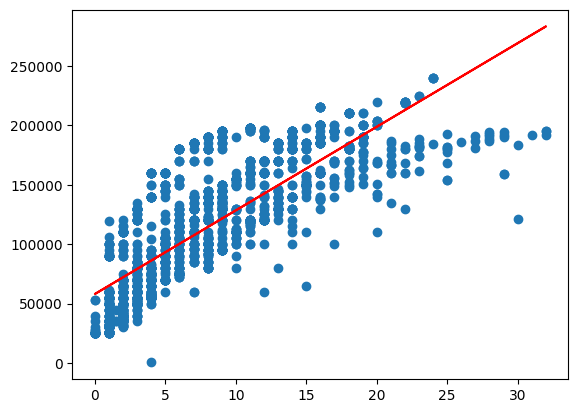

In [51]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

### Checking predicted values by storing them in Dataframe

In [52]:
df_prediction = pd.DataFrame()

In [53]:
df_prediction['Years of Experience']=X_test
df_prediction['Salary']=y_test
df_prediction['Predicted Salary']=round(y_pred,2)

In [54]:
df_prediction

,Years of Experience,Salary,Predicted Salary
6244,9.0,145000.0,121392.90
4426,1.0,25000.0,65136.76
2577,25.0,177177.0,233905.18
5428,8.0,120000.0,114360.88
3043,13.0,140010.0,149520.97
...,...,...,...
4231,1.0,26000.0,65136.76
4458,2.0,37000.0,72168.78
739,5.0,160000.0,93264.83
3530,1.0,32000.0,65136.76


### Linear Regression using `linear_model` in `sklearn`

In [55]:
#splitting the data in train and test 
X_train_lm,X_test_lm,y_train_lm,y_test_lm = train_test_split(X,y, train_size=0.7, random_state=17)

In [56]:
#let us now see the values for X_train_lm and y_train_lm

In [57]:
X_train_lm.head()

1837     6.0
3832    13.0
1763     3.0
4536     4.0
284      9.0
Name: Years of Experience, dtype: float64

In [58]:
y_train_lm.head()

1837    115000.0
3832    140000.0
1763     90000.0
4536     70000.0
284     100000.0
Name: Salary, dtype: float64

In [59]:
X_train_lm.shape

(4689,)

In [60]:
#reshaping it to have 2D array

In [61]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [62]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(4689, 1)
(4689,)
(2010, 1)
(2010,)


In [63]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [64]:
print(lm.intercept_)
print(lm.coef_)

58104.74382510482
[7032.0175935]


In [65]:
y_pred_lm = lm.predict(X_test_lm)

In [66]:
y_pred_lm

array([121392.90216663,  65136.76141861, 233905.18366269, ...,
        93264.83179262,  65136.76141861, 121392.90216663])

##### Looking at the RMSE

In [67]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test_lm, y_pred_lm))

31321.264752841103

##### Checking the R-squared on the test set

In [68]:
r_squared = r2_score(y_test_lm, y_pred_lm)
r_squared

0.6487107286475258

### Checking predicted values by storing them in Dataframe

In [69]:
df_prediction_lm = pd.DataFrame()

In [70]:
df_prediction_lm['Years of Experience']=X_test
df_prediction_lm['Salary']=y_test
df_prediction_lm['Predicted Salary']=y_pred_lm

In [71]:
df_prediction_lm

,Years of Experience,Salary,Predicted Salary
6244,9.0,145000.0,121392.902167
4426,1.0,25000.0,65136.761419
2577,25.0,177177.0,233905.183663
5428,8.0,120000.0,114360.884573
3043,13.0,140010.0,149520.972541
...,...,...,...
4231,1.0,26000.0,65136.761419
4458,2.0,37000.0,72168.779012
739,5.0,160000.0,93264.831793
3530,1.0,32000.0,65136.761419


### <span style="color: blue;">So, from above analysis we have seen that with any method our prediction is same.</span> 